In [7]:

#Se importan las librerías


import matplotlib.pyplot as plt
#import json
#from copy import deepcopy
import urllib
from pprint import pprint 
#import networkx as nx
import geopandas as gdp
import numpy as np
import requests
import pandas as pd 


In [8]:
setup_path = "/Users/drossi/DevDownloads/atlas-de-riesgo-precipitacion.csv"

In [9]:
df = pd.read_csv(setup_path)
df.head()

,id,geo_point_2d,geo_shape,fenomeno,taxonomia,r_p_v_e,intensidad,descripcio,fuente,cvegeo,alcaldia,entidad,area_m2,perime_m,period_ret,intens_uni,intens_num,int2
0,817.0,"19.3628767409,-99.2270030874","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Medio,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0901000012254,Álvaro Obregón,Ciudad de México,251046.580885,3065.230119,5 años,mm,60 a 64,3
1,825.0,"19.359713645,-99.1126636533","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Bajo,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900700010958,Iztapalapa,Ciudad de México,263600.343771,2128.493232,5 años,mm,54 a 60,2
2,838.0,"19.3499612368,-99.0618445374","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Bajo,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900700011443,Iztapalapa,Ciudad de México,153030.578543,2165.541417,5 años,mm,54 a 60,2
3,844.0,"19.3743243684,-99.0503042071","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Bajo,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900700014556,Iztapalapa,Ciudad de México,26861.442595,774.887642,5 años,mm,54 a 60,2
4,851.0,"19.3232006479,-99.045198103","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Muy Bajo,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900700015728,Iztapalapa,Ciudad de México,67828.062894,1189.839611,5 años,mm,41 a 54,1


In [10]:
df_np = df.to_numpy()
df_np[:,2]

array(['{"type": "MultiPolygon", "coordinates": [[[[-99.22523326660581, 19.364950194884198], [-99.22483491184282, 19.365049511631106], [-99.22461660079759, 19.36450169932384], [-99.22452189584993, 19.364252104488553], [-99.22442997531118, 19.36415055525862], [-99.22433184262098, 19.364102008021533], [-99.22417244362936, 19.364084864767793], [-99.22397305706035, 19.364111556059946], [-99.22372225708625, 19.36415613360945], [-99.22335536524437, 19.364267361895205], [-99.22300470839468, 19.36446749063845], [-99.22273930580906, 19.36463257350818], [-99.22264554005355, 19.36466021893322], [-99.22239272786999, 19.364673920043035], [-99.22062970872447, 19.364662833467293], [-99.2224994492218, 19.364009183932954], [-99.22301871231448, 19.363827648437514], [-99.22334292215972, 19.363645867783013], [-99.22376889787392, 19.363166844678467], [-99.22396074236941, 19.36270270704104], [-99.2240341366802, 19.362442715896858], [-99.224083580623, 19.362347535022923], [-99.22487790704872, 19.362033492103

In [17]:
np.shape(df_np[:,2])

(4908,)

In [26]:
nptext = np.array2string(df_np)

In [33]:
#type(df_np[1:,2][0])
df_np[1:,2]

array(['{"type": "MultiPolygon", "coordinates": [[[[-99.11469208666243, 19.356883264063217], [-99.11524508667681, 19.356935565193655], [-99.11477464292693, 19.35886430074312], [-99.11471096044788, 19.359147223299633], [-99.11430051255802, 19.360970684977413], [-99.11385185739412, 19.36285987403369], [-99.1133304288644, 19.362802914321346], [-99.11286310769603, 19.362749490955437], [-99.11241918108598, 19.362698238221483], [-99.11147458391532, 19.36260968817724], [-99.11105383189472, 19.36256838532459], [-99.11058924738923, 19.362514639454623], [-99.11011254061903, 19.362461242104555], [-99.1101739237913, 19.362188747181403], [-99.11036763931932, 19.361335721320167], [-99.1105439054843, 19.3605600225026], [-99.1109449150388, 19.35872108644365], [-99.11101190457882, 19.35844128541274], [-99.11113085432356, 19.35793890677527], [-99.11143479155139, 19.356630186839055], [-99.11153153595271, 19.356638230596836], [-99.11194700415157, 19.356672770810285], [-99.11238087168677, 19.35670376032608

In [ ]:
df_np[1:,2][0]

In [28]:
cdmx = gdp.read_file(df_np[:,2][0])
#cdmx = gdp.read_file(nptext)
type(cdmx)

geopandas.geodataframe.GeoDataFrame

In [35]:


for i in df_np[1:,2]:
    cdmx = pd.concat([cdmx, gdp.read_file(i)])

<AxesSubplot:>

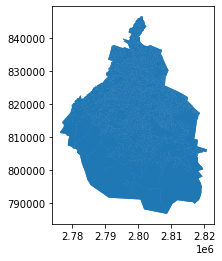

In [36]:
cdmx = cdmx.to_crs(6362)
cdmx.plot()